In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
df = pd.read_csv('electricity_bill_dataset.csv')

In [3]:
# Display basic info
print("Dataset Head:\n", df.head())

# Select relevant features for clustering
features = df[['MonthlyHours', 'ElectricityBill']]

Dataset Head:
    Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill  
0         8.4           3225.6  
1    

In [7]:
# Assuming 'df' is your DataFrame
# 1. Handle missing values
print("Missing Values Summary:")
print(df.isnull().sum())  # Check for missing values







Missing Values Summary:
Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64


In [ ]:
# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:

# Choose the number of clusters using Elbow Method (optional visualization)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

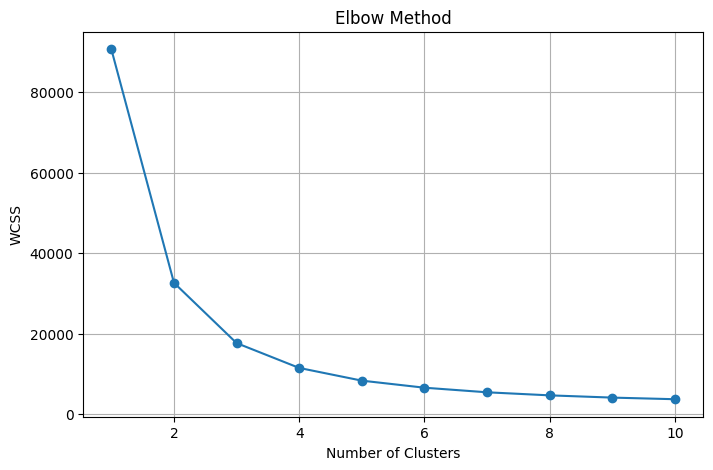

In [ ]:
# Plot the Elbow graph
plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


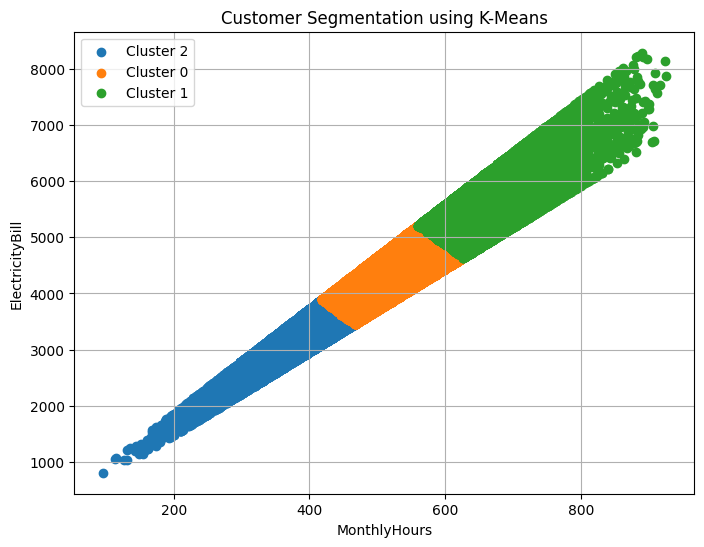

   Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill  Cluster  
0         8.4           3225.6        2  
1 

In [ ]:
# Apply KMeans with optimal number of clusters (say, 3)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the Clusters
plt.figure(figsize=(8,6))
for cluster in df['Cluster'].unique():
    plt.scatter(df[df['Cluster']==cluster]['MonthlyHours'],
                df[df['Cluster']==cluster]['ElectricityBill'],
                label=f'Cluster {cluster}')
plt.xlabel('MonthlyHours')
plt.ylabel('ElectricityBill')
plt.title('Customer Segmentation using K-Means')
plt.legend()
plt.grid(True)
plt.show()

# Check the clustered data
print(df.head())